In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Carga de bases de datos existentes

In [256]:
ordenes = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_orders_dataset.csv")
clientes = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_customers_dataset.csv")
vendedores = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_sellers_dataset.csv")
productos = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_products_dataset.csv")
items = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_order_items_dataset.csv")
nombre_categoria = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_category_name_translation.csv")
localizacion = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_geolocation_dataset.csv")
pagos = pd.read_csv("/content/drive/MyDrive/Bootcamp/M3 - Python/Shopify/shopify_order_payments_dataset 2.csv")

## Lectura de bases de datos para revisión de contenido/estructura

In [257]:
ordenes

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [258]:
ordenes["customer_id"].nunique()

99441

In [259]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [260]:
vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [261]:
productos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [262]:
clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [263]:
clientes["customer_id"].nunique()

99441

Se observa que la cantidad de clientes únicos que corresponde a columna "customer_unique_id" es menor que la de "customer_id"

In [264]:
clientes["customer_unique_id"].value_counts()

,count
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
4f83c83b7ff5b544a8c75dcb8ad66e2e,1
3fe413dde400746c53c5d0d38b266ca2,1
289e1d1ce11a14bb169775d58ad2f1c2,1


In [265]:
localizacion

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [266]:
nombre_categoria

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [267]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [268]:
pagos

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [269]:
pagos["order_id"].nunique()

99440

In [270]:
items.groupby("product_id")["order_id"].count().sort_values(ascending=False)

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
ffd7628b0b0b98ebc549e8e4c54a59af,1
ffd63ee42a5c8cc5a15a1c8e2aa50011,1
002959d7a0b0990fe2d69988affcbc80,1


## Agrupación de la columna "payment_value" que corresponde al pago total por cada orden diferente (order_id)

In [271]:
pagos_acum = pagos.groupby("order_id")["payment_value"].sum().reset_index()
pagos_acum

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [272]:
pagos_acum["payment_value"].min()

0.0

## Creación de data que combina la información de órdenes y clientes

In [273]:
data = ordenes.merge(pagos_acum, on="order_id", how="left").merge(clientes, on="customer_id", how="left")
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   payment_value                  99440 non-null  float64
 9   customer_unique_id             99441 non-null  object 
 10  customer_zip_code_prefix       99441 non-null  int64  
 11  customer_city                  99441 non-null  object 
 12  customer_state                 99441 non-null 

In [275]:
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   payment_value                  99440 non-null  float64       
 9   customer_unique_id             99441 non-null  object        
 10  customer_zip_code_prefix       99441 non-null  int64         
 11  customer_city  

## Limpieza de datos

In [277]:
data[data["payment_value"].isna()==True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP


In [278]:
data[data["payment_value"]==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,0.0,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP
39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00,0.0,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP
40235,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,2018-09-11 00:00:00,0.0,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP


In [279]:
data["order_status"].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [280]:
data["order_status"].value_counts(1)*100

,proportion
order_status,
delivered,97.020344
shipped,1.113223
canceled,0.628513
unavailable,0.612423
invoiced,0.315765
processing,0.302692
created,0.005028
approved,0.002011


In [281]:
no_disponible = data[data["order_status"]=="unavailable"]
no_disponible

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,84.00,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,97.68,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,132.46,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,134.38,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00,615.53,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00,131.78,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00,934.09,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,210.09,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,195.91,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [282]:
no_disponible["order_delivered_carrier_date"].unique()

array([nan], dtype=object)

Se filtra un dataset sin los estados de orden "canceled" (cancelado) ni "unavaiable" (no disponible) que no representan ni el 1% de los datos

In [283]:
dataset = data[(data['order_status'] != 'canceled') & (data['order_status'] != 'unavailable')].dropna(subset=["payment_value"])
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [284]:
dataset['mes_anio'] = dataset['order_purchase_timestamp'].dt.strftime('%Y-%m')
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anio
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01


In [285]:
dataset["semana_iso"] = dataset["order_purchase_timestamp"].dt.isocalendar().week
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anio,semana_iso
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,30
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,32
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,46
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,10
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,6
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,34
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2


In [286]:
dataset["anio_semana"] = dataset["order_purchase_timestamp"].dt.strftime("%Y-%W")
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anio,semana_iso,anio_semana
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,40,2017-40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,30,2018-30
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,32,2018-32
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,46,2017-46
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,7,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,10,2017-10
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,6,2018-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,34,2017-34
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2,2018-02


In [287]:
fecha_maxima = dataset["order_purchase_timestamp"].max()
fecha_maxima

Timestamp('2018-09-03 09:06:57')

###Se calcula la diferencia de días con respecto a la fecha máxima existente en dataset

In [288]:
dataset["Dif_dias"] = (fecha_maxima - dataset["order_purchase_timestamp"]).dt.days
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anio,semana_iso,anio_semana,Dif_dias
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,40,2017-40,335
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,30,2018-30,40
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,32,2018-32,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,46,2017-46,288
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,7,2018-07,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,10,2017-10,542
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,6,2018-06,208
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,34,2017-34,371
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2,2018-02,237


##Recencia

In [289]:
dataset_recencia = dataset.groupby("customer_unique_id")["order_purchase_timestamp"].max().reset_index()
dataset_recencia

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [290]:
dataset_recencia["Dif_dias"] = (fecha_maxima - dataset_recencia["order_purchase_timestamp"]).dt.days
dataset_recencia

,customer_unique_id,order_purchase_timestamp,Dif_dias
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


In [291]:
dataset_recencia["Recencia"] = pd.qcut(dataset_recencia["Dif_dias"], q=3, labels=[3, 2, 1])
dataset_recencia

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,3
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2
...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451,1
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266,2
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572,1
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123,3


In [292]:
dataset_recencia["Recencia"].value_counts()

,count
Recencia,
3,31821
1,31636
2,31532


## Frecuencia

In [293]:
dataset["anio_semana"].value_counts()

,count
anio_semana,
2017-47,2973
2017-48,2077
2018-31,2030
2018-19,1971
2018-32,1961
...,...
2017-01,46
2016-41,37
2016-35,1


In [294]:
dataset["mes_anio"].value_counts()

,count
mes_anio,
2017-11,7423
2018-01,7187
2018-03,7168
2018-04,6919
2018-05,6833
2018-02,6625
2018-08,6421
2018-07,6233
2018-06,6145


In [295]:
dataset["order_purchase_timestamp"].min()

Timestamp('2016-09-04 21:15:19')

In [296]:
dataset_frecuencia = dataset.groupby("customer_unique_id")["order_id"].count().reset_index().rename(columns={"order_id":"cantidad_ordenes"})
dataset_frecuencia

,customer_unique_id,cantidad_ordenes
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,1
94985,fffea47cd6d3cc0a88bd621562a9d061,1
94986,ffff371b4d645b6ecea244b27531430a,1
94987,ffff5962728ec6157033ef9805bacc48,1


In [297]:
dataset_frecuencia["cantidad_ordenes"].value_counts()

,count
cantidad_ordenes,
1,92101
2,2652
3,188
4,29
5,9
6,5
7,3
9,1
16,1


In [298]:
dataset_frecuencia["cantidad_ordenes"].value_counts(1)

,proportion
cantidad_ordenes,
1,0.969596
2,0.027919
3,0.001979
4,0.000305
5,0.000095
6,0.000053
7,0.000032
9,0.000011
16,0.000011


In [299]:
dataset_frecuencia[dataset_frecuencia["cantidad_ordenes"]==3]

,customer_unique_id,cantidad_ordenes
1082,02e9109b7e0a985108b43e573b6afb23,3
1522,041caba6a63ace5818387698ea85cdb2,3
2465,06a52782a04f0086d16b9c22d0e29438,3
2874,07b1b60bca2b6326fa2adb259ea4a55f,3
3297,08c07c761592a71b85136aa4fe76a6f4,3
...,...,...
92338,f8bc1d81f395f6239a2a5ab1b9edf1ab,3
93657,fc719c11b4dce594f47e1f9aa739a3a2,3
94063,fd8ccc89be43894d2553494c71a61fd8,3
94363,fe59d5878cd80080edbd29b5a0a4e1cf,3


In [300]:
dataset_frecuencia["frecuencia"] = dataset_frecuencia["cantidad_ordenes"].apply(
    lambda x:1 if x == 1 else (2 if x == 2 else 3))

In [301]:
dataset_frecuencia["frecuencia"].value_counts()

,count
frecuencia,
1,92101
2,2652
3,236


In [302]:
dataset_frecuencia

,customer_unique_id,cantidad_ordenes,frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,1,1
94985,fffea47cd6d3cc0a88bd621562a9d061,1,1
94986,ffff371b4d645b6ecea244b27531430a,1,1
94987,ffff5962728ec6157033ef9805bacc48,1,1


## Monto

In [303]:
dataset["payment_value"].describe()

,payment_value
count,98206.000000
mean,160.266552
std,219.121818
min,9.590000
25%,62.000000
50%,105.280000
75%,176.750000
max,13664.080000


In [304]:
dataset_monto = dataset.groupby("customer_unique_id")["payment_value"].sum().reset_index()
dataset_monto

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
94985,fffea47cd6d3cc0a88bd621562a9d061,84.58
94986,ffff371b4d645b6ecea244b27531430a,112.46
94987,ffff5962728ec6157033ef9805bacc48,133.69


In [305]:
dataset_monto["monto"]= pd.qcut(dataset_monto["payment_value"], q=3, labels=[1,2,3])
dataset_monto

,customer_unique_id,payment_value,monto
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,0000f46a3911fa3c0805444483337064,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,3
...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,3
94985,fffea47cd6d3cc0a88bd621562a9d061,84.58,2
94986,ffff371b4d645b6ecea244b27531430a,112.46,2
94987,ffff5962728ec6157033ef9805bacc48,133.69,2


In [306]:
dataset_monto["monto"].value_counts()

,count
monto,
1,31668
3,31663
2,31658


### Esto es una validación para conocer si habría alguna diferencia si solo se filtra por la categoría 3 y se hace una subdivisión

In [307]:
dataset_monto2= dataset_monto[dataset_monto["monto"]==3]
dataset_monto2

,customer_unique_id,payment_value,monto
4,0004aac84e0df4da2b147fca70cf8255,196.89,3
5,0004bd2a26a76fe21f786e4fbd80607f,166.98,3
7,00053a61a98854899e70ed204dd4bafe,419.18,3
18,000de6019bb59f34c099a907c151d855,257.44,3
22,000fbf0473c10fc1ab6f8d2d286ce20c,362.38,3
...,...,...,...
94976,fff5eb4918b2bf4b2da476788d42051c,2844.96,3
94978,fff7219c86179ca6441b8f37823ba3d3,265.80,3
94982,fffbf87b7a1a6fa8b03f081c5f51a201,167.32,3
94983,fffcc512b7dfecaffd80f13614af1d16,710.70,3


In [308]:
dataset_monto2["rango2"] = pd.qcut(dataset_monto2["payment_value"], q=3)
dataset_monto2

/tmp/ipython-input-171343723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_monto2["rango2"] = pd.qcut(dataset_monto2["payment_value"], q=3)


,customer_unique_id,payment_value,monto,rango2
4,0004aac84e0df4da2b147fca70cf8255,196.89,3,"(196.18, 300.58]"
5,0004bd2a26a76fe21f786e4fbd80607f,166.98,3,"(152.109, 196.18]"
7,00053a61a98854899e70ed204dd4bafe,419.18,3,"(300.58, 13664.08]"
18,000de6019bb59f34c099a907c151d855,257.44,3,"(196.18, 300.58]"
22,000fbf0473c10fc1ab6f8d2d286ce20c,362.38,3,"(300.58, 13664.08]"
...,...,...,...,...
94976,fff5eb4918b2bf4b2da476788d42051c,2844.96,3,"(300.58, 13664.08]"
94978,fff7219c86179ca6441b8f37823ba3d3,265.80,3,"(196.18, 300.58]"
94982,fffbf87b7a1a6fa8b03f081c5f51a201,167.32,3,"(152.109, 196.18]"
94983,fffcc512b7dfecaffd80f13614af1d16,710.70,3,"(300.58, 13664.08]"


In [309]:
dataset_monto2["rango2"].value_counts()

,count
rango2,
"(300.58, 13664.08]",10555
"(152.109, 196.18]",10554
"(196.18, 300.58]",10554


### Finalmente tenemos los 3 dataset necesarios para calcular el RFM

In [310]:
dataset_recencia

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,3
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2
...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451,1
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266,2
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572,1
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123,3


In [311]:
dataset_frecuencia

,customer_unique_id,cantidad_ordenes,frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,1,1
94985,fffea47cd6d3cc0a88bd621562a9d061,1,1
94986,ffff371b4d645b6ecea244b27531430a,1,1
94987,ffff5962728ec6157033ef9805bacc48,1,1


In [312]:
dataset_monto

,customer_unique_id,payment_value,monto
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,0000f46a3911fa3c0805444483337064,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,3
...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,3
94985,fffea47cd6d3cc0a88bd621562a9d061,84.58,2
94986,ffff371b4d645b6ecea244b27531430a,112.46,2
94987,ffff5962728ec6157033ef9805bacc48,133.69,2


### dataset_final corresponde a la combinación de los clientes únicos con su respectiva clasificación

In [313]:
dataset_final = dataset_recencia.merge(dataset_frecuencia, on="customer_unique_id", how="left").merge(dataset_monto, on="customer_unique_id", how="left")
dataset_final

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,3,1,1,141.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,3,1,1,27.19,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1,1,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,3
...,...,...,...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451,1,1,1,2067.42,3
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266,2,1,1,84.58,2
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572,1,1,1,112.46,2
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123,3,1,1,133.69,2


### Se calcula el RFM por cliente

In [314]:
dataset_final["RFM"] = dataset_final["Recencia"].astype(str) + dataset_final["frecuencia"].astype(str) + dataset_final["monto"].astype(str)
dataset_final

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,3,1,1,141.90,2,312
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,3,1,1,27.19,1,311
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1,1,1,43.62,1,111
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,3,213
...,...,...,...,...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451,1,1,1,2067.42,3,113
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266,2,1,1,84.58,2,212
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572,1,1,1,112.46,2,112
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123,3,1,1,133.69,2,312


In [315]:
dataset_final["RFM"].nunique()

25

### Se revisa el porcentaje de participación de cada valor de RFM

In [316]:
dataset_final["RFM"].value_counts(1)*100

,proportion
RFM,
211,11.262357
111,11.211825
312,11.022329
112,11.018118
311,10.745455
313,10.624388
212,10.580172
213,10.315931
113,10.179073


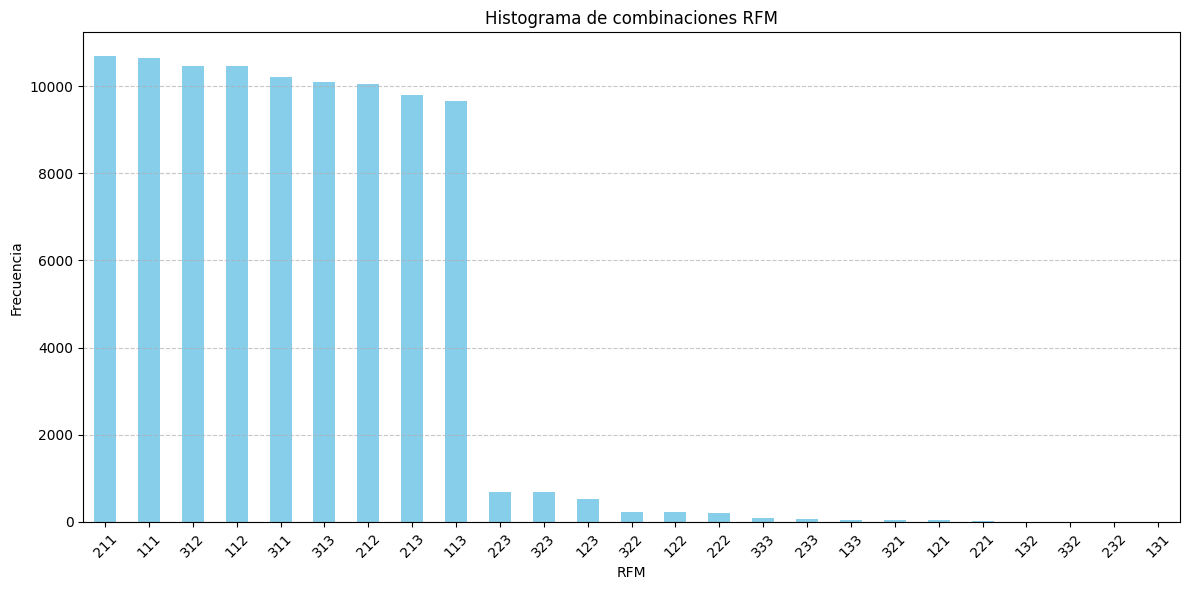

In [317]:
dataset_final["RFM"].value_counts().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.xlabel('RFM')
plt.ylabel('Frecuencia')
plt.title('Histograma de combinaciones RFM')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Depuración de clientes repetidos

In [318]:
clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [319]:
clientes["customer_unique_id"].nunique()

96096

In [320]:
clientes_unicos = clientes.drop_duplicates(subset=["customer_unique_id"])
clientes_unicos

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Combinar el dataset_final con los clientes únicos

In [321]:
dataset_final_city = dataset_final.merge(clientes_unicos, on="customer_unique_id", how="left")
dataset_final_city

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,3,1,1,141.90,2,312,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,3,1,1,27.19,1,311,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2,112,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1,1,1,43.62,1,111,914991f0c02ef0843c0e7010c819d642,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,3,213,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451,1,1,1,2067.42,3,113,74be082247cd677a147d83ee670e9d53,55250,sanharo,PE
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266,2,1,1,84.58,2,212,0ecf8e0a08148af0bf313184f167670a,44054,feira de santana,BA
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572,1,1,1,112.46,2,112,27f584b0f1dc4e610065c240f68b6be0,78552,sinop,MT
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123,3,1,1,133.69,2,312,832a3b0254347d409512ae92eaf154a6,29460,bom jesus do norte,ES


###Se revisan los RFM con categoría en monto 3 ya que son clientes que han gastado más

---



In [322]:
data113 = dataset_final_city[dataset_final_city["RFM"]=="113"]
data113

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state
18,000de6019bb59f34c099a907c151d855,2017-08-17 19:10:33,381,1,1,1,257.44,3,113,455f2e2988eaf87d7e2ba33b0a57969f,11612,sao sebastiao,SP
23,0010a452c6d13139e50b57f19f52e04e,2017-07-11 11:22:43,418,1,1,1,325.93,3,113,3529b35e86160baf0aa22a9770420250,95611,taquara,RS
25,001147e649a7b1afd577e873841632dd,2017-08-31 17:12:56,367,1,1,1,212.16,3,113,5247e5c7e9037e74343f13bbd8800a6a,87020,maringa,PR
27,0011805441c0d1b68b48002f1d005526,2017-04-24 13:36:48,496,1,1,1,297.14,3,113,728e136fca2819b62d610743ae2904b8,68639,goianesia do para,PA
28,0011857aff0e5871ce5eb429f21cdaf5,2017-06-28 11:08:38,431,1,1,1,192.83,3,113,b821d548247d9c319bd595260efe677e,9070,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94945,ffe39c116d96cd81dcdfd9dcca655cd1,2017-07-24 11:18:16,405,1,1,1,231.27,3,113,4f9d2f4a5d093805bb6949385799b967,29500,alegre,ES
94946,ffe3e199b9d0b7fb7d2d29a5b9498447,2017-03-15 17:16:36,536,1,1,1,162.10,3,113,e85ff8cc3cc2c09bdb9204dd7930c0fb,38411,uberlandia,MG
94955,ffe9102bb78a76921ba0ff3c4659616a,2017-06-09 13:25:52,450,1,1,1,416.36,3,113,9f007da472be12e0c1b223a9320805f9,22260,rio de janeiro,RJ
94961,ffebb6424578e7bb153322da9d65634f,2017-01-16 14:04:11,594,1,1,1,665.70,3,113,3619684d733b95a9860ca496206a6ab0,7260,guarulhos,SP


In [323]:
data213 = dataset_final_city[dataset_final_city["RFM"]=="213"]
data213

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,3,213,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,186,2,1,1,419.18,3,213,a81ebb9b32f102298c0c89635b4b3154,80410,curitiba,PR
55,0028a7d8db7b0247652509358ad8d755,2017-12-13 15:49:39,263,2,1,1,354.87,3,213,57063b7216d8c3380b2aff7a02ec17b8,13273,valinhos,SP
59,002aba8c1af80acacef6e011f9f23262,2018-02-27 12:47:48,187,2,1,1,217.74,3,213,a13cbaa8e1b1fffbfe0e01d938789f51,23860,mangaratiba,RJ
84,00370dfde3d012c420d29657afc2fc8b,2018-01-29 12:54:38,216,2,1,1,237.00,3,213,4dfeeaf74cd7936d013802d1cc2e0c0a,96930,candelaria,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94958,ffe9be10b9a58c5464d833e8b1b2c632,2017-11-27 14:18:56,279,2,1,1,155.73,3,213,855f0b8c477c57d9c5d0210c260459a5,35519,nova serrana,MG
94959,ffe9e41fbd14db4a7361347c56af5447,2018-02-11 12:51:07,203,2,1,1,220.88,3,213,eac5c7df93a1df2256f7b1ef0e5b9e71,29101,vila velha,ES
94971,fff1bdd5c5e37ca79dd74deeb91aa5b6,2018-02-24 17:38:14,190,2,1,1,172.98,3,213,ed369d5d0e1850f096e478def9027961,77824,araguaina,TO
94978,fff7219c86179ca6441b8f37823ba3d3,2017-12-27 18:57:38,249,2,1,1,265.80,3,213,7aa03a53e8c6489f3854470b6ebe9537,28680,cachoeiras de macacu,RJ


In [324]:
data313 = dataset_final_city[dataset_final_city["RFM"]=="313"]
data313

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,3,1,1,166.98,3,313,4a913a170c26e3c8052ed0202849b5a8,5036,sao paulo,SP
22,000fbf0473c10fc1ab6f8d2d286ce20c,2018-07-26 09:43:52,38,3,1,1,362.38,3,313,4b95f958af9c866353ae1108d8ebd023,13330,indaiatuba,SP
36,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,9,3,1,1,164.81,3,313,cec800e76b1cc898de17926aa9e1e146,4757,sao paulo,SP
40,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,124,3,1,1,197.27,3,313,591cb16ea1a6d8f7eebd0a349593bea2,78015,cuiaba,MT
42,001a34eb30ecb8e3aacb07c475ca4dd1,2018-07-11 19:49:54,53,3,1,1,161.71,3,313,4b29474c60ebdcf9372db1c79c2190b7,4078,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94957,ffe96c782a5bc522bd8bad3bc638981a,2018-07-30 14:17:23,34,3,1,1,245.22,3,313,21340bc68e361154e5329c3c655dca4f,88215,bombinhas,SC
94965,ffeddf8aa7cdecf403e77b2e9a99e2ea,2018-05-13 16:04:51,112,3,1,1,204.20,3,313,22a4b8a7912abc2b02051dca85e02564,68030,santarem,PA
94973,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,135,3,1,1,200.90,3,313,731ab8b73356171649cb8ed97ee1c99f,23017,rio de janeiro,RJ
94976,fff5eb4918b2bf4b2da476788d42051c,2018-07-02 16:39:59,62,3,1,1,2844.96,3,313,ed583a2a1eaf0dedc33af816153e8b8c,58407,campina grande,PB


### Se hace un filtro con estos 3 valores de RFM

In [325]:
dataset_filtro = dataset_final_city[(dataset_final_city["RFM"]=="313") | (dataset_final_city["RFM"]=="213") | (dataset_final_city["RFM"]=="113")]
dataset_filtro


,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,3,213,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,3,1,1,166.98,3,313,4a913a170c26e3c8052ed0202849b5a8,5036,sao paulo,SP
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,186,2,1,1,419.18,3,213,a81ebb9b32f102298c0c89635b4b3154,80410,curitiba,PR
18,000de6019bb59f34c099a907c151d855,2017-08-17 19:10:33,381,1,1,1,257.44,3,113,455f2e2988eaf87d7e2ba33b0a57969f,11612,sao sebastiao,SP
22,000fbf0473c10fc1ab6f8d2d286ce20c,2018-07-26 09:43:52,38,3,1,1,362.38,3,313,4b95f958af9c866353ae1108d8ebd023,13330,indaiatuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94976,fff5eb4918b2bf4b2da476788d42051c,2018-07-02 16:39:59,62,3,1,1,2844.96,3,313,ed583a2a1eaf0dedc33af816153e8b8c,58407,campina grande,PB
94978,fff7219c86179ca6441b8f37823ba3d3,2017-12-27 18:57:38,249,2,1,1,265.80,3,213,7aa03a53e8c6489f3854470b6ebe9537,28680,cachoeiras de macacu,RJ
94982,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41,249,2,1,1,167.32,3,213,ed421f2bf6c0ea955e4ac8a5fe646b94,60055,fortaleza,CE
94983,fffcc512b7dfecaffd80f13614af1d16,2018-04-11 00:34:32,145,3,1,1,710.70,3,313,a1746e37af49aa5afd6b195baed286eb,28909,cabo frio,RJ


In [326]:
pd.crosstab(dataset_filtro["customer_state"], dataset_filtro["RFM"], normalize="index")*100

RFM,113,213,313
customer_state,,,
AC,47.222222,19.444444,33.333333
AL,39.106145,33.519553,27.374302
AM,37.500000,32.142857,30.357143
AP,30.000000,46.666667,23.333333
BA,35.111876,30.464716,34.423408
CE,38.077634,31.792976,30.129390
DF,27.853881,36.529680,35.616438
ES,34.370140,33.125972,32.503888
GO,36.825886,30.046225,33.127889


### Se evalúa la categoría 313 para ver en qué estados existe mayor participación

In [327]:
data313["customer_state"].value_counts(1)*100

,proportion
customer_state,
SP,38.921918
RJ,12.356322
MG,11.325803
RS,5.142687
PR,5.132778
BA,3.963535
SC,3.913991
PE,2.437574
DF,2.318668


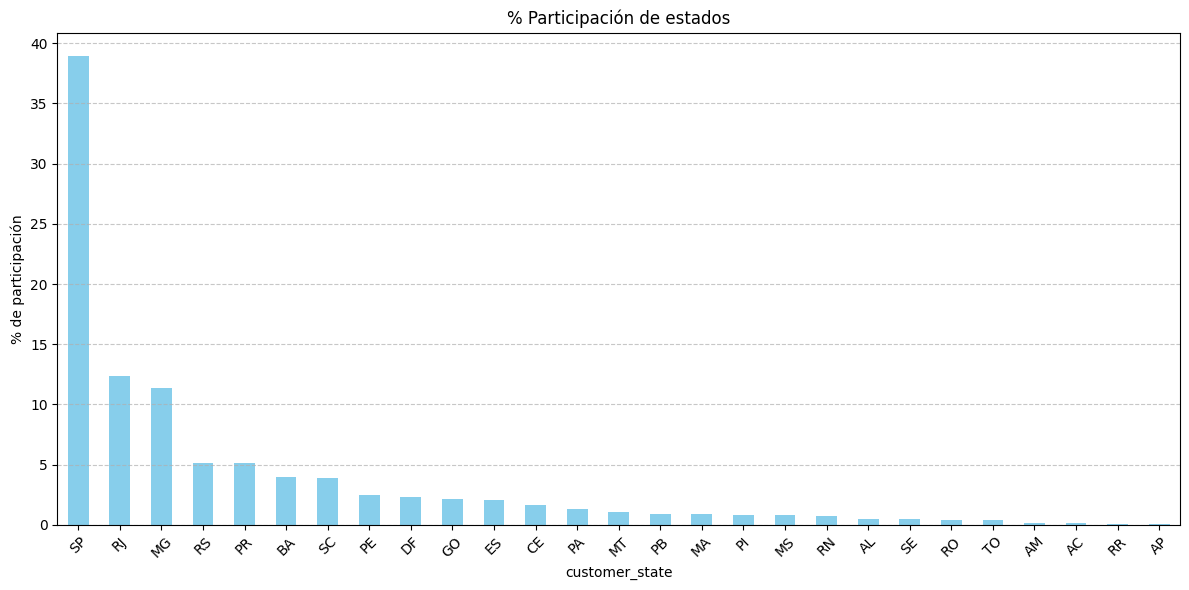

In [328]:
(data313["customer_state"].value_counts(1)*100).plot(kind='bar', figsize=(12,6), color='skyblue')
plt.xlabel('customer_state')
plt.ylabel('% de participación')
plt.title('% Participación de estados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Se toma la decisión de trabajar con la base de datos data313 como base principal para realizar los siguientes análisis**

In [329]:
data313

,customer_unique_id,order_purchase_timestamp,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,3,1,1,166.98,3,313,4a913a170c26e3c8052ed0202849b5a8,5036,sao paulo,SP
22,000fbf0473c10fc1ab6f8d2d286ce20c,2018-07-26 09:43:52,38,3,1,1,362.38,3,313,4b95f958af9c866353ae1108d8ebd023,13330,indaiatuba,SP
36,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,9,3,1,1,164.81,3,313,cec800e76b1cc898de17926aa9e1e146,4757,sao paulo,SP
40,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,124,3,1,1,197.27,3,313,591cb16ea1a6d8f7eebd0a349593bea2,78015,cuiaba,MT
42,001a34eb30ecb8e3aacb07c475ca4dd1,2018-07-11 19:49:54,53,3,1,1,161.71,3,313,4b29474c60ebdcf9372db1c79c2190b7,4078,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94957,ffe96c782a5bc522bd8bad3bc638981a,2018-07-30 14:17:23,34,3,1,1,245.22,3,313,21340bc68e361154e5329c3c655dca4f,88215,bombinhas,SC
94965,ffeddf8aa7cdecf403e77b2e9a99e2ea,2018-05-13 16:04:51,112,3,1,1,204.20,3,313,22a4b8a7912abc2b02051dca85e02564,68030,santarem,PA
94973,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,135,3,1,1,200.90,3,313,731ab8b73356171649cb8ed97ee1c99f,23017,rio de janeiro,RJ
94976,fff5eb4918b2bf4b2da476788d42051c,2018-07-02 16:39:59,62,3,1,1,2844.96,3,313,ed583a2a1eaf0dedc33af816153e8b8c,58407,campina grande,PB


### Se procede a realizar la combinación de data313 con la base órdenes

In [330]:
data313_ordenes = data313.merge(ordenes, on="customer_id", how="inner")
data313_ordenes

,customer_unique_id,order_purchase_timestamp_x,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp_y,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,3,1,1,166.98,3,313,4a913a170c26e3c8052ed0202849b5a8,5036,sao paulo,SP,3e470077b690ea3e3d501cffb5e0c499,delivered,2018-04-05 19:33:16,2018-04-05 19:48:59,2018-04-07 00:38:52,2018-04-07 16:12:43,2018-04-19 00:00:00
1,000fbf0473c10fc1ab6f8d2d286ce20c,2018-07-26 09:43:52,38,3,1,1,362.38,3,313,4b95f958af9c866353ae1108d8ebd023,13330,indaiatuba,SP,87440e08790d85796f5b8bc9f5ed2707,delivered,2018-07-26 09:43:52,2018-07-27 02:05:20,2018-07-30 13:32:00,2018-08-03 16:04:33,2018-08-17 00:00:00
2,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,9,3,1,1,164.81,3,313,cec800e76b1cc898de17926aa9e1e146,4757,sao paulo,SP,aa14b8f4567fef1be1a8912ca010f1c7,delivered,2018-08-24 21:17:00,2018-08-24 21:30:16,2018-08-27 12:43:00,2018-08-30 21:32:40,2018-09-10 00:00:00
3,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,124,3,1,1,197.27,3,313,591cb16ea1a6d8f7eebd0a349593bea2,78015,cuiaba,MT,18bb4acb90913593d37049c601660009,delivered,2018-05-01 09:25:32,2018-05-01 09:56:57,2018-05-07 15:12:00,2018-05-18 21:34:38,2018-06-07 00:00:00
4,001a34eb30ecb8e3aacb07c475ca4dd1,2018-07-11 19:49:54,53,3,1,1,161.71,3,313,4b29474c60ebdcf9372db1c79c2190b7,4078,sao paulo,SP,279b9a9df2c05138cfda068bb1e0143d,delivered,2018-07-11 19:49:54,2018-07-11 20:06:12,2018-07-12 11:58:00,2018-07-13 17:59:35,2018-07-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10087,ffe96c782a5bc522bd8bad3bc638981a,2018-07-30 14:17:23,34,3,1,1,245.22,3,313,21340bc68e361154e5329c3c655dca4f,88215,bombinhas,SC,0d92f9c47e96d946ca421dd3ea531b2a,delivered,2018-07-30 14:17:23,2018-07-30 14:30:54,2018-07-31 14:12:00,2018-08-07 18:55:17,2018-08-13 00:00:00
10088,ffeddf8aa7cdecf403e77b2e9a99e2ea,2018-05-13 16:04:51,112,3,1,1,204.20,3,313,22a4b8a7912abc2b02051dca85e02564,68030,santarem,PA,b40d597f0eb58c117cb5d9e424f10426,delivered,2018-05-13 16:04:51,2018-05-13 16:15:16,2018-05-17 11:57:00,2018-06-19 20:16:35,2018-06-13 00:00:00
10089,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,135,3,1,1,200.90,3,313,731ab8b73356171649cb8ed97ee1c99f,23017,rio de janeiro,RJ,9a22906fa846451c54fca825591c0577,delivered,2018-04-20 11:03:47,2018-04-20 11:15:16,2018-05-07 14:43:00,2018-05-11 12:08:54,2018-06-01 00:00:00
10090,fff5eb4918b2bf4b2da476788d42051c,2018-07-02 16:39:59,62,3,1,1,2844.96,3,313,ed583a2a1eaf0dedc33af816153e8b8c,58407,campina grande,PB,cf4659487be50c0c317cff3564c4a840,delivered,2018-07-02 16:39:59,2018-07-05 16:04:19,2018-07-06 08:25:00,2018-07-16 11:12:52,2018-08-01 00:00:00


### Se realizan combinaciones necesarias para llegar a nivel de producto

In [331]:
data313_ordenes

,customer_unique_id,order_purchase_timestamp_x,Dif_dias,Recencia,cantidad_ordenes,frecuencia,payment_value,monto,RFM,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp_y,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,3,1,1,166.98,3,313,4a913a170c26e3c8052ed0202849b5a8,5036,sao paulo,SP,3e470077b690ea3e3d501cffb5e0c499,delivered,2018-04-05 19:33:16,2018-04-05 19:48:59,2018-04-07 00:38:52,2018-04-07 16:12:43,2018-04-19 00:00:00
1,000fbf0473c10fc1ab6f8d2d286ce20c,2018-07-26 09:43:52,38,3,1,1,362.38,3,313,4b95f958af9c866353ae1108d8ebd023,13330,indaiatuba,SP,87440e08790d85796f5b8bc9f5ed2707,delivered,2018-07-26 09:43:52,2018-07-27 02:05:20,2018-07-30 13:32:00,2018-08-03 16:04:33,2018-08-17 00:00:00
2,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,9,3,1,1,164.81,3,313,cec800e76b1cc898de17926aa9e1e146,4757,sao paulo,SP,aa14b8f4567fef1be1a8912ca010f1c7,delivered,2018-08-24 21:17:00,2018-08-24 21:30:16,2018-08-27 12:43:00,2018-08-30 21:32:40,2018-09-10 00:00:00
3,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,124,3,1,1,197.27,3,313,591cb16ea1a6d8f7eebd0a349593bea2,78015,cuiaba,MT,18bb4acb90913593d37049c601660009,delivered,2018-05-01 09:25:32,2018-05-01 09:56:57,2018-05-07 15:12:00,2018-05-18 21:34:38,2018-06-07 00:00:00
4,001a34eb30ecb8e3aacb07c475ca4dd1,2018-07-11 19:49:54,53,3,1,1,161.71,3,313,4b29474c60ebdcf9372db1c79c2190b7,4078,sao paulo,SP,279b9a9df2c05138cfda068bb1e0143d,delivered,2018-07-11 19:49:54,2018-07-11 20:06:12,2018-07-12 11:58:00,2018-07-13 17:59:35,2018-07-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10087,ffe96c782a5bc522bd8bad3bc638981a,2018-07-30 14:17:23,34,3,1,1,245.22,3,313,21340bc68e361154e5329c3c655dca4f,88215,bombinhas,SC,0d92f9c47e96d946ca421dd3ea531b2a,delivered,2018-07-30 14:17:23,2018-07-30 14:30:54,2018-07-31 14:12:00,2018-08-07 18:55:17,2018-08-13 00:00:00
10088,ffeddf8aa7cdecf403e77b2e9a99e2ea,2018-05-13 16:04:51,112,3,1,1,204.20,3,313,22a4b8a7912abc2b02051dca85e02564,68030,santarem,PA,b40d597f0eb58c117cb5d9e424f10426,delivered,2018-05-13 16:04:51,2018-05-13 16:15:16,2018-05-17 11:57:00,2018-06-19 20:16:35,2018-06-13 00:00:00
10089,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,135,3,1,1,200.90,3,313,731ab8b73356171649cb8ed97ee1c99f,23017,rio de janeiro,RJ,9a22906fa846451c54fca825591c0577,delivered,2018-04-20 11:03:47,2018-04-20 11:15:16,2018-05-07 14:43:00,2018-05-11 12:08:54,2018-06-01 00:00:00
10090,fff5eb4918b2bf4b2da476788d42051c,2018-07-02 16:39:59,62,3,1,1,2844.96,3,313,ed583a2a1eaf0dedc33af816153e8b8c,58407,campina grande,PB,cf4659487be50c0c317cff3564c4a840,delivered,2018-07-02 16:39:59,2018-07-05 16:04:19,2018-07-06 08:25:00,2018-07-16 11:12:52,2018-08-01 00:00:00


In [332]:
data_items = items.merge(data313_ordenes, on="order_id", how="inner")
display(data_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp_y,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,60,...,9ed5e522dd9dd85b4af4a077526d8117,11702,praia grande,SP,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00
1,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,6062db572f3ef38b7a8ff4307abbfad3,2018-04-25 09:10:41,130,...,8a250edc40ebc5c3940ebc940f16a7eb,13044,campinas,SP,delivered,2018-04-25 09:10:41,2018-04-25 09:33:19,2018-04-27 15:14:00,2018-04-30 17:54:25,2018-05-09 00:00:00
2,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:33:38,114,...,fff5169e583fd07fac9fec88962f189d,13458,santa barbara d'oeste,SP,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22 00:00:00
3,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11,f99edeaa8a00f9866fd8fce5a0b83d4f,2018-05-08 21:45:54,117,...,ce0421a97232c2a1194cdb66cd3ebb9d,60125,fortaleza,CE,delivered,2018-05-08 21:45:54,2018-05-08 22:14:46,2018-05-09 13:51:00,2018-05-30 19:38:36,2018-06-05 00:00:00
4,0025c5d1a8ca53a240ec2634bb4492ea,1,35537536ed2b4c561b4018bf3abf54e0,955fee9216a65b617aa5c0531780ce60,2018-07-10 09:30:09,390.00,29.39,fa78b26c2fa23b2ebda98c2926305c1d,2018-07-08 09:17:59,56,...,2430ad4b1b6efb56cf3050b5d3cf5e54,61979,amanari,CE,delivered,2018-07-08 09:17:59,2018-07-08 09:30:09,2018-07-10 13:36:00,2018-07-31 10:51:58,2018-08-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,ffc97f5975c4aa1b3c9754d83050c73d,1,1c4dbd58e9b07007a271122f96bb0add,c33847515fa6305ce6feb1e818569f13,2018-06-28 01:30:35,149.00,41.33,0378d90f53fc5cc775e447e1eaff6ea3,2018-06-22 00:13:26,73,...,2713513e2014d3d6181fd3ed037d4a80,23060,rio de janeiro,RJ,delivered,2018-06-22 00:13:26,2018-06-23 01:40:06,2018-06-27 11:45:00,2018-07-11 23:08:37,2018-08-06 00:00:00
12840,ffea20c7630343a6cd9e09858c1295cd,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-05-27 23:54:50,149.90,13.34,adee1f41a8a1659b461473d88cb6975e,2018-05-23 23:33:30,102,...,79e8c1737d903a4055c4d2aa87661bf7,9351,maua,SP,delivered,2018-05-23 23:33:30,2018-05-23 23:54:50,2018-05-25 07:10:00,2018-06-04 17:58:36,2018-06-20 00:00:00
12841,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.90,51.20,a1c2e4b4c1b29e41684ebdf3cc6538f8,2018-07-13 20:04:05,51,...,050309b91cc5e04e68841938e7984aaf,28740,conceicao de macabu,RJ,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00
12842,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,132,...,b51593916b4b8e0d6f66f2ae24f2673d,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00


In [333]:
data_productos = data_items.merge(productos, on="product_id", how="inner")
display(data_productos)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,60,...,2018-07-09 14:04:07,2018-07-25 00:00:00,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0
1,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,6062db572f3ef38b7a8ff4307abbfad3,2018-04-25 09:10:41,130,...,2018-04-30 17:54:25,2018-05-09 00:00:00,consoles_games,37.0,1172.0,2.0,200.0,16.0,5.0,12.0
2,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:33:38,114,...,2018-05-18 16:46:31,2018-05-22 00:00:00,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0
3,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11,f99edeaa8a00f9866fd8fce5a0b83d4f,2018-05-08 21:45:54,117,...,2018-05-30 19:38:36,2018-06-05 00:00:00,bebes,38.0,471.0,2.0,8250.0,44.0,32.0,35.0
4,0025c5d1a8ca53a240ec2634bb4492ea,1,35537536ed2b4c561b4018bf3abf54e0,955fee9216a65b617aa5c0531780ce60,2018-07-10 09:30:09,390.00,29.39,fa78b26c2fa23b2ebda98c2926305c1d,2018-07-08 09:17:59,56,...,2018-07-31 10:51:58,2018-08-03 00:00:00,esporte_lazer,59.0,1459.0,9.0,2100.0,36.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,ffc97f5975c4aa1b3c9754d83050c73d,1,1c4dbd58e9b07007a271122f96bb0add,c33847515fa6305ce6feb1e818569f13,2018-06-28 01:30:35,149.00,41.33,0378d90f53fc5cc775e447e1eaff6ea3,2018-06-22 00:13:26,73,...,2018-07-11 23:08:37,2018-08-06 00:00:00,cama_mesa_banho,52.0,627.0,1.0,6350.0,30.0,30.0,30.0
12840,ffea20c7630343a6cd9e09858c1295cd,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-05-27 23:54:50,149.90,13.34,adee1f41a8a1659b461473d88cb6975e,2018-05-23 23:33:30,102,...,2018-06-04 17:58:36,2018-06-20 00:00:00,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0
12841,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.90,51.20,a1c2e4b4c1b29e41684ebdf3cc6538f8,2018-07-13 20:04:05,51,...,2018-07-23 19:44:45,2018-08-07 00:00:00,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
12842,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,132,...,2018-05-10 22:56:40,2018-05-18 00:00:00,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0


In [334]:
data_productos["Dia_Sem"] = data_productos["order_purchase_timestamp_x"].dt.day_name()
data_productos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Dia_Sem
0,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,60,...,2018-07-25 00:00:00,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,Wednesday
1,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,6062db572f3ef38b7a8ff4307abbfad3,2018-04-25 09:10:41,130,...,2018-05-09 00:00:00,consoles_games,37.0,1172.0,2.0,200.0,16.0,5.0,12.0,Wednesday
2,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:33:38,114,...,2018-05-22 00:00:00,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0,Friday
3,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11,f99edeaa8a00f9866fd8fce5a0b83d4f,2018-05-08 21:45:54,117,...,2018-06-05 00:00:00,bebes,38.0,471.0,2.0,8250.0,44.0,32.0,35.0,Tuesday
4,0025c5d1a8ca53a240ec2634bb4492ea,1,35537536ed2b4c561b4018bf3abf54e0,955fee9216a65b617aa5c0531780ce60,2018-07-10 09:30:09,390.00,29.39,fa78b26c2fa23b2ebda98c2926305c1d,2018-07-08 09:17:59,56,...,2018-08-03 00:00:00,esporte_lazer,59.0,1459.0,9.0,2100.0,36.0,9.0,14.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,ffc97f5975c4aa1b3c9754d83050c73d,1,1c4dbd58e9b07007a271122f96bb0add,c33847515fa6305ce6feb1e818569f13,2018-06-28 01:30:35,149.00,41.33,0378d90f53fc5cc775e447e1eaff6ea3,2018-06-22 00:13:26,73,...,2018-08-06 00:00:00,cama_mesa_banho,52.0,627.0,1.0,6350.0,30.0,30.0,30.0,Friday
12840,ffea20c7630343a6cd9e09858c1295cd,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-05-27 23:54:50,149.90,13.34,adee1f41a8a1659b461473d88cb6975e,2018-05-23 23:33:30,102,...,2018-06-20 00:00:00,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0,Wednesday
12841,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.90,51.20,a1c2e4b4c1b29e41684ebdf3cc6538f8,2018-07-13 20:04:05,51,...,2018-08-07 00:00:00,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,Friday
12842,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,132,...,2018-05-18 00:00:00,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,Monday


In [335]:
data_final = data_productos[data_productos["customer_state"].isin(["SP","RJ", "MG","RS", "PR", "BA", "SC"])]
data_final

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Dia_Sem
0,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,60,...,2018-07-25 00:00:00,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,Wednesday
1,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,6062db572f3ef38b7a8ff4307abbfad3,2018-04-25 09:10:41,130,...,2018-05-09 00:00:00,consoles_games,37.0,1172.0,2.0,200.0,16.0,5.0,12.0,Wednesday
2,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:33:38,114,...,2018-05-22 00:00:00,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0,Friday
5,0029c5db35ef291ce99d1262012e7daa,1,7614c62b86a81021243e438cfde78ccc,900ba814c251a692506d7834c1218441,2018-09-03 03:50:23,492.75,21.62,b31e69e978d97f380d52102ac379fd7e,2018-08-25 00:09:40,9,...,2018-09-03 00:00:00,beleza_saude,53.0,1135.0,5.0,9900.0,30.0,39.0,38.0,Saturday
6,002c9def9c9b951b1bec6d50753c9891,1,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,6bcc1cd0c7f8bffa6f67a6a1fbef5782,2018-05-14 16:57:47,111,...,2018-05-25 00:00:00,utilidades_domesticas,44.0,543.0,3.0,950.0,25.0,10.0,36.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,ffc49b9c9d666410e9ecdb0a3efadb9c,1,f96ff9b997681965689f78bef092fdd9,2a5b78b41cd05baeac8df54c6606b92c,2018-06-05 19:56:23,765.00,27.06,974fcb536095266b0620344239af2d66,2018-05-28 19:29:49,97,...,2018-07-11 00:00:00,beleza_saude,26.0,1064.0,1.0,250.0,20.0,10.0,15.0,Monday
12839,ffc97f5975c4aa1b3c9754d83050c73d,1,1c4dbd58e9b07007a271122f96bb0add,c33847515fa6305ce6feb1e818569f13,2018-06-28 01:30:35,149.00,41.33,0378d90f53fc5cc775e447e1eaff6ea3,2018-06-22 00:13:26,73,...,2018-08-06 00:00:00,cama_mesa_banho,52.0,627.0,1.0,6350.0,30.0,30.0,30.0,Friday
12840,ffea20c7630343a6cd9e09858c1295cd,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-05-27 23:54:50,149.90,13.34,adee1f41a8a1659b461473d88cb6975e,2018-05-23 23:33:30,102,...,2018-06-20 00:00:00,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0,Wednesday
12841,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.90,51.20,a1c2e4b4c1b29e41684ebdf3cc6538f8,2018-07-13 20:04:05,51,...,2018-08-07 00:00:00,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,Friday


In [336]:
ordenes_agrupadas= data_final.groupby(["customer_state", "product_category_name"])["order_id"].count().sort_values(ascending=False).reset_index()
ordenes_agrupadas

,customer_state,product_category_name,order_id
0,SP,cama_mesa_banho,568
1,SP,beleza_saude,544
2,SP,relogios_presentes,437
3,SP,moveis_decoracao,417
4,SP,utilidades_domesticas,387
...,...,...,...
340,SP,fashion_underwear_e_moda_praia,1
341,SP,fraldas_higiene,1
342,SP,flores,1
343,BA,audio,1


### Se toman las 5 categorías con más órdenes por estado

In [337]:
top_categorias_estado = (ordenes_agrupadas.sort_values(['customer_state', "order_id"], ascending=[True, False]).groupby('customer_state').head(5))
top_categorias_estado

,customer_state,product_category_name,order_id
39,BA,beleza_saude,63
43,BA,relogios_presentes,57
67,BA,moveis_decoracao,34
69,BA,cama_mesa_banho,33
85,BA,utilidades_domesticas,27
13,MG,beleza_saude,148
14,MG,cama_mesa_banho,138
17,MG,utilidades_domesticas,135
18,MG,relogios_presentes,133
26,MG,moveis_decoracao,107


### Se revisan las 5 categorías con menos órdenes por estado

In [338]:
ultimas_categorias_estado = (ordenes_agrupadas.sort_values(['customer_state', "order_id"], ascending=[True, False]).groupby('customer_state').tail(5))
ultimas_categorias_estado

,customer_state,product_category_name,order_id
309,BA,consoles_games,1
335,BA,fashion_calcados,1
338,BA,moveis_quarto,1
343,BA,audio,1
344,BA,artigos_de_natal,1
332,MG,construcao_ferramentas_jardim,1
333,MG,portateis_cozinha_e_preparadores_de_alimentos,1
334,MG,industria_comercio_e_negocios,1
336,MG,artigos_de_natal,1
339,MG,cine_foto,1


In [339]:
grouped = data_final.groupby(["customer_state", "Dia_Sem"])["Dia_Sem"].count()

In [340]:
grouped_df = grouped.reset_index(name='count')

### Analizar los días con menor cantidad de órdenes por estado

In [341]:
min_days = grouped_df.loc[grouped_df.groupby("customer_state")["count"].idxmin()]
min_days

,customer_state,Dia_Sem,count
2,BA,Saturday,49
9,MG,Saturday,146
16,PR,Saturday,57
24,RJ,Sunday,185
30,RS,Saturday,50
37,SC,Saturday,55
44,SP,Saturday,499


In [342]:
ordenes_st_cat_prod= data_final.groupby(["customer_state", "product_id", "product_category_name"])["order_id"].count().reset_index()
ordenes_st_cat_prod

,customer_state,product_id,product_category_name,order_id
0,BA,01cb96c64e8e35f29826a58963f6ecc5,construcao_ferramentas_iluminacao,1
1,BA,01cf56cd6138b926a4802d16fc304149,eletronicos,1
2,BA,02ad78835ec3f72e750d1dfa6a7e11b3,moveis_decoracao,2
3,BA,02b750ee6f6f12a23c311b775ee4427a,bebes,1
4,BA,03826ede2cac52b3011b58cfd58c84f9,utilidades_domesticas,1
...,...,...,...,...
6514,SP,ffbfe460c6f140cdbe4f494be6dd43be,eletrodomesticos,1
6515,SP,ffc9caf33e2d1e9f44e3e06da19085f7,beleza_saude,12
6516,SP,ffd2365fb8224dc66883df9351d65deb,relogios_presentes,1
6517,SP,ffe013e1b4603e3b0b02fbb159d5b400,esporte_lazer,1


### Se revisan los 5 productos con más órdenes por estado

In [343]:
top_productos_estado = (ordenes_st_cat_prod.sort_values(['customer_state', "order_id"], ascending=[True, False]).groupby('customer_state').head(5))
top_productos_estado

,customer_state,product_id,product_category_name,order_id
303,BA,e7cc48a9daff5436f63d3aad9426f28b,telefonia,13
91,BA,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,11
191,BA,8ed094bfe076c568f6bb10feada3f75d,moveis_escritorio,8
246,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,7
133,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,6
579,MG,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,30
755,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,17
655,MG,52c80cedd4e90108bf4fa6a206ef6b03,ferramentas_jardim,12
911,MG,97f1396a5a1f7c07ba51784efdec44b8,utilidades_domesticas,10
1258,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,10


### Se revisan los 5 productos con menos órdenes por estado

In [344]:
ultimos_productos_estado = (ordenes_st_cat_prod.sort_values(['customer_state', "order_id"], ascending=[True, False]).groupby('customer_state').tail(5))
ultimos_productos_estado

,customer_state,product_id,product_category_name,order_id
347,BA,fe75529a267b76ac6e96f0c322a899a4,beleza_saude,1
348,BA,fe9dfbe7f974621789683b7b78be2a16,beleza_saude,1
349,BA,ff3ec972ebd16eb98d55e8ea2fa255ee,esporte_lazer,1
350,BA,ff5d87897ed26d564711df324b98ebee,relogios_presentes,1
351,BA,ffc9caf33e2d1e9f44e3e06da19085f7,beleza_saude,1
1290,MG,fdc1340be043a0e6807741d687fc1cd4,relogios_presentes,1
1291,MG,fdf37ff6a4ff39ac973343a01c1f91ef,beleza_saude,1
1292,MG,fe077ec80df6b4ee60bb4498d5ab1962,informatica_acessorios,1
1293,MG,feeed1b9f26cce6eb3cb81af65eddd9e,relogios_presentes,1
1295,MG,ffc9caf33e2d1e9f44e3e06da19085f7,beleza_saude,1


### Verificación de que existen más de 5 categorías con 1 orden

In [345]:
ordenes_agrupadas[ordenes_agrupadas["order_id"]==1]

,customer_state,product_category_name,order_id
295,BA,casa_conforto,1
296,BA,casa_construcao,1
297,RS,pc_gamer,1
298,RS,market_place,1
299,RS,livros_interesse_geral,1
300,SC,fashion_calcados,1
301,SC,bebidas,1
302,SC,casa_conforto,1
303,SC,artes_e_artesanato,1
304,SC,audio,1


In [346]:
data_final

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Dia_Sem
0,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,60,...,2018-07-25 00:00:00,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,Wednesday
1,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,6062db572f3ef38b7a8ff4307abbfad3,2018-04-25 09:10:41,130,...,2018-05-09 00:00:00,consoles_games,37.0,1172.0,2.0,200.0,16.0,5.0,12.0,Wednesday
2,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:33:38,114,...,2018-05-22 00:00:00,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0,Friday
5,0029c5db35ef291ce99d1262012e7daa,1,7614c62b86a81021243e438cfde78ccc,900ba814c251a692506d7834c1218441,2018-09-03 03:50:23,492.75,21.62,b31e69e978d97f380d52102ac379fd7e,2018-08-25 00:09:40,9,...,2018-09-03 00:00:00,beleza_saude,53.0,1135.0,5.0,9900.0,30.0,39.0,38.0,Saturday
6,002c9def9c9b951b1bec6d50753c9891,1,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,6bcc1cd0c7f8bffa6f67a6a1fbef5782,2018-05-14 16:57:47,111,...,2018-05-25 00:00:00,utilidades_domesticas,44.0,543.0,3.0,950.0,25.0,10.0,36.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,ffc49b9c9d666410e9ecdb0a3efadb9c,1,f96ff9b997681965689f78bef092fdd9,2a5b78b41cd05baeac8df54c6606b92c,2018-06-05 19:56:23,765.00,27.06,974fcb536095266b0620344239af2d66,2018-05-28 19:29:49,97,...,2018-07-11 00:00:00,beleza_saude,26.0,1064.0,1.0,250.0,20.0,10.0,15.0,Monday
12839,ffc97f5975c4aa1b3c9754d83050c73d,1,1c4dbd58e9b07007a271122f96bb0add,c33847515fa6305ce6feb1e818569f13,2018-06-28 01:30:35,149.00,41.33,0378d90f53fc5cc775e447e1eaff6ea3,2018-06-22 00:13:26,73,...,2018-08-06 00:00:00,cama_mesa_banho,52.0,627.0,1.0,6350.0,30.0,30.0,30.0,Friday
12840,ffea20c7630343a6cd9e09858c1295cd,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-05-27 23:54:50,149.90,13.34,adee1f41a8a1659b461473d88cb6975e,2018-05-23 23:33:30,102,...,2018-06-20 00:00:00,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0,Wednesday
12841,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.90,51.20,a1c2e4b4c1b29e41684ebdf3cc6538f8,2018-07-13 20:04:05,51,...,2018-08-07 00:00:00,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,Friday


### A continuación de realizan nuevas combinaciones de bases de datos para proponer estrategias más adecuadas

In [347]:
data_final["state_category"] = data_final["customer_state"] + data_final["product_category_name"]
data_final

/tmp/ipython-input-2642698191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["state_category"] = data_final["customer_state"] + data_final["product_category_name"]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Dia_Sem,state_category
0,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,60,...,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,Wednesday,SPferramentas_jardim
1,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,6062db572f3ef38b7a8ff4307abbfad3,2018-04-25 09:10:41,130,...,consoles_games,37.0,1172.0,2.0,200.0,16.0,5.0,12.0,Wednesday,SPconsoles_games
2,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,6457be0b331148fb5454efc88d1e03d9,2018-05-11 20:33:38,114,...,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0,Friday,SPperfumaria
5,0029c5db35ef291ce99d1262012e7daa,1,7614c62b86a81021243e438cfde78ccc,900ba814c251a692506d7834c1218441,2018-09-03 03:50:23,492.75,21.62,b31e69e978d97f380d52102ac379fd7e,2018-08-25 00:09:40,9,...,beleza_saude,53.0,1135.0,5.0,9900.0,30.0,39.0,38.0,Saturday,SPbeleza_saude
6,002c9def9c9b951b1bec6d50753c9891,1,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,6bcc1cd0c7f8bffa6f67a6a1fbef5782,2018-05-14 16:57:47,111,...,utilidades_domesticas,44.0,543.0,3.0,950.0,25.0,10.0,36.0,Monday,SPutilidades_domesticas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,ffc49b9c9d666410e9ecdb0a3efadb9c,1,f96ff9b997681965689f78bef092fdd9,2a5b78b41cd05baeac8df54c6606b92c,2018-06-05 19:56:23,765.00,27.06,974fcb536095266b0620344239af2d66,2018-05-28 19:29:49,97,...,beleza_saude,26.0,1064.0,1.0,250.0,20.0,10.0,15.0,Monday,PRbeleza_saude
12839,ffc97f5975c4aa1b3c9754d83050c73d,1,1c4dbd58e9b07007a271122f96bb0add,c33847515fa6305ce6feb1e818569f13,2018-06-28 01:30:35,149.00,41.33,0378d90f53fc5cc775e447e1eaff6ea3,2018-06-22 00:13:26,73,...,cama_mesa_banho,52.0,627.0,1.0,6350.0,30.0,30.0,30.0,Friday,RJcama_mesa_banho
12840,ffea20c7630343a6cd9e09858c1295cd,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-05-27 23:54:50,149.90,13.34,adee1f41a8a1659b461473d88cb6975e,2018-05-23 23:33:30,102,...,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0,Wednesday,SPinformatica_acessorios
12841,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.90,51.20,a1c2e4b4c1b29e41684ebdf3cc6538f8,2018-07-13 20:04:05,51,...,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,Friday,RJferramentas_jardim


In [348]:
top_categorias_estado

,customer_state,product_category_name,order_id
39,BA,beleza_saude,63
43,BA,relogios_presentes,57
67,BA,moveis_decoracao,34
69,BA,cama_mesa_banho,33
85,BA,utilidades_domesticas,27
13,MG,beleza_saude,148
14,MG,cama_mesa_banho,138
17,MG,utilidades_domesticas,135
18,MG,relogios_presentes,133
26,MG,moveis_decoracao,107


In [349]:
top_categorias_estado["state_category"] = top_categorias_estado["customer_state"] + top_categorias_estado["product_category_name"]
top_categorias_estado

,customer_state,product_category_name,order_id,state_category
39,BA,beleza_saude,63,BAbeleza_saude
43,BA,relogios_presentes,57,BArelogios_presentes
67,BA,moveis_decoracao,34,BAmoveis_decoracao
69,BA,cama_mesa_banho,33,BAcama_mesa_banho
85,BA,utilidades_domesticas,27,BAutilidades_domesticas
13,MG,beleza_saude,148,MGbeleza_saude
14,MG,cama_mesa_banho,138,MGcama_mesa_banho
17,MG,utilidades_domesticas,135,MGutilidades_domesticas
18,MG,relogios_presentes,133,MGrelogios_presentes
26,MG,moveis_decoracao,107,MGmoveis_decoracao


### Dataset con las categorías con más ordenes por estado

In [350]:
data_top_cat_estado = data_final.merge(top_categorias_estado, on="state_category", how="inner")
data_top_cat_estado

,order_id_x,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp_x,Dif_dias,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Dia_Sem,state_category,customer_state_y,product_category_name_y,order_id_y
0,0029c5db35ef291ce99d1262012e7daa,1,7614c62b86a81021243e438cfde78ccc,900ba814c251a692506d7834c1218441,2018-09-03 03:50:23,492.75,21.62,b31e69e978d97f380d52102ac379fd7e,2018-08-25 00:09:40,9,...,5.0,9900.0,30.0,39.0,38.0,Saturday,SPbeleza_saude,SP,beleza_saude,544
1,002c9def9c9b951b1bec6d50753c9891,1,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,6bcc1cd0c7f8bffa6f67a6a1fbef5782,2018-05-14 16:57:47,111,...,3.0,950.0,25.0,10.0,36.0,Monday,SPutilidades_domesticas,SP,utilidades_domesticas,387
2,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,6bcc1cd0c7f8bffa6f67a6a1fbef5782,2018-05-14 16:57:47,111,...,3.0,950.0,25.0,10.0,36.0,Monday,SPutilidades_domesticas,SP,utilidades_domesticas,387
3,002f16b7bc4530031b7d90f791b12d8a,1,d54c5b81fc2b38707588dd4eddc7c594,0241d4d5d36f10f80c644447315af0bd,2018-07-04 17:11:12,249.90,34.23,eb859d4b5ab54b643d2c0cedaca0c9fb,2018-07-02 16:51:47,62,...,1.0,7850.0,52.0,18.0,35.0,Monday,SPmoveis_decoracao,SP,moveis_decoracao,417
4,007bbb40c95870c0f75a7855f2636c65,1,0ec7b6a863e219792bc4d50d3a62a839,1e8b33f18b4f7598d87f5cbee2282cc2,2018-04-30 11:31:27,148.90,13.95,dce5c2ba30e0cdab93060715a2f7dafb,2018-04-24 10:37:50,131,...,4.0,7474.0,54.0,29.0,40.0,Tuesday,SPcama_mesa_banho,SP,cama_mesa_banho,568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,ffb2c3a5bb149a2f860e5d057096201f,2,683647534fe73616ae97d91a6ef253f4,49383af7ab774e4e8f3000f49c83dc4b,2018-05-10 20:30:46,55.00,22.97,5d006d94bc156f30b9f21145d0980a0c,2018-05-03 20:12:46,122,...,1.0,1400.0,20.0,5.0,15.0,Thursday,MGcama_mesa_banho,MG,cama_mesa_banho,138
4774,ffb2c3a5bb149a2f860e5d057096201f,3,683647534fe73616ae97d91a6ef253f4,49383af7ab774e4e8f3000f49c83dc4b,2018-05-10 20:30:46,55.00,22.97,5d006d94bc156f30b9f21145d0980a0c,2018-05-03 20:12:46,122,...,1.0,1400.0,20.0,5.0,15.0,Thursday,MGcama_mesa_banho,MG,cama_mesa_banho,138
4775,ffb2c3a5bb149a2f860e5d057096201f,4,683647534fe73616ae97d91a6ef253f4,49383af7ab774e4e8f3000f49c83dc4b,2018-05-10 20:30:46,55.00,22.97,5d006d94bc156f30b9f21145d0980a0c,2018-05-03 20:12:46,122,...,1.0,1400.0,20.0,5.0,15.0,Thursday,MGcama_mesa_banho,MG,cama_mesa_banho,138
4776,ffc49b9c9d666410e9ecdb0a3efadb9c,1,f96ff9b997681965689f78bef092fdd9,2a5b78b41cd05baeac8df54c6606b92c,2018-06-05 19:56:23,765.00,27.06,974fcb536095266b0620344239af2d66,2018-05-28 19:29:49,97,...,1.0,250.0,20.0,10.0,15.0,Monday,PRbeleza_saude,PR,beleza_saude,56


In [351]:
estado_cat_prod_precio = data_top_cat_estado.groupby(["state_category","customer_state_y", "product_id", "product_category_name_y","price"])["order_id_y"].count().reset_index()
estado_cat_prod_precio

,state_category,customer_state_y,product_id,product_category_name_y,price,order_id_y
0,BAbeleza_saude,BA,050d890ccc1c0874e166c9af9c6dd821,beleza_saude,85.61,1
1,BAbeleza_saude,BA,06c950c36d589b39b34f5dc1d4a75e29,beleza_saude,499.65,1
2,BAbeleza_saude,BA,0a783d7ce18a37749c3a059cf829564b,beleza_saude,151.00,1
3,BAbeleza_saude,BA,0a783d7ce18a37749c3a059cf829564b,beleza_saude,152.00,1
4,BAbeleza_saude,BA,181f62ad3d1d8b78fa2695f30613b444,beleza_saude,259.90,1
...,...,...,...,...,...,...
3146,SPutilidades_domesticas,SP,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,12
3147,SPutilidades_domesticas,SP,f9549e7746c357cc4228720985abbab2,utilidades_domesticas,134.90,1
3148,SPutilidades_domesticas,SP,fa9cc1dfd86d0877d43101973bf26eee,utilidades_domesticas,449.00,1
3149,SPutilidades_domesticas,SP,fbd4031ddbc3d02b95834b62769d3ad0,utilidades_domesticas,138.00,3


In [352]:
mejor_producto_categoria = (estado_cat_prod_precio.sort_values(['state_category', "order_id_y"], ascending=[True, False]).groupby('state_category').head(1))
mejor_producto_categoria

,state_category,customer_state_y,product_id,product_category_name_y,price,order_id_y
32,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7
56,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6
86,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3
115,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3
174,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2
194,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9
331,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5
401,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5
481,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7
620,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10


In [353]:
ultimos_producto_categoria = (estado_cat_prod_precio.sort_values(['state_category', "order_id_y"], ascending=[True, False]).groupby('state_category').tail(10))
ultimos_producto_categoria

,state_category,customer_state_y,product_id,product_category_name_y,price,order_id_y
39,BAbeleza_saude,BA,ed60a3c48bc2642660f93ddaeddd6515,beleza_saude,339.00,1
40,BAbeleza_saude,BA,ef814c6dd6dc000a73c50dbaedef4002,beleza_saude,141.61,1
41,BAbeleza_saude,BA,f2c6bb3c72a67ac37f14bae1faddcf40,beleza_saude,151.72,1
42,BAbeleza_saude,BA,f7740e5b4337a3cc4a8a204553101a85,beleza_saude,485.90,1
43,BAbeleza_saude,BA,f9624194634737145e6066d831213df8,beleza_saude,198.90,1
...,...,...,...,...,...,...
3142,SPutilidades_domesticas,SP,f5b952758d88a5995ae5c8208a63b913,utilidades_domesticas,135.00,1
3145,SPutilidades_domesticas,SP,f7ffa4d2418f29ea48467e55f3a770c2,utilidades_domesticas,139.99,1
3147,SPutilidades_domesticas,SP,f9549e7746c357cc4228720985abbab2,utilidades_domesticas,134.90,1
3148,SPutilidades_domesticas,SP,fa9cc1dfd86d0877d43101973bf26eee,utilidades_domesticas,449.00,1


### De los últimos productos, se aplica el criterio de utilizar el precio más alto para definir los combos

In [354]:
filtro = estado_cat_prod_precio[estado_cat_prod_precio["order_id_y"]==1]
filtro

,state_category,customer_state_y,product_id,product_category_name_y,price,order_id_y
0,BAbeleza_saude,BA,050d890ccc1c0874e166c9af9c6dd821,beleza_saude,85.61,1
1,BAbeleza_saude,BA,06c950c36d589b39b34f5dc1d4a75e29,beleza_saude,499.65,1
2,BAbeleza_saude,BA,0a783d7ce18a37749c3a059cf829564b,beleza_saude,151.00,1
3,BAbeleza_saude,BA,0a783d7ce18a37749c3a059cf829564b,beleza_saude,152.00,1
4,BAbeleza_saude,BA,181f62ad3d1d8b78fa2695f30613b444,beleza_saude,259.90,1
...,...,...,...,...,...,...
3142,SPutilidades_domesticas,SP,f5b952758d88a5995ae5c8208a63b913,utilidades_domesticas,135.00,1
3145,SPutilidades_domesticas,SP,f7ffa4d2418f29ea48467e55f3a770c2,utilidades_domesticas,139.99,1
3147,SPutilidades_domesticas,SP,f9549e7746c357cc4228720985abbab2,utilidades_domesticas,134.90,1
3148,SPutilidades_domesticas,SP,fa9cc1dfd86d0877d43101973bf26eee,utilidades_domesticas,449.00,1


In [355]:
ultimo_producto_mejor_precio = (filtro.sort_values(['state_category', "price"], ascending=[True, False]).groupby('state_category').head(1))
ultimo_producto_mejor_precio

,state_category,customer_state_y,product_id,product_category_name_y,price,order_id_y
14,BAbeleza_saude,BA,46e24ce614899e36617e37ea1e4aa6ff,beleza_saude,1050.00,1
65,BAcama_mesa_banho,BA,c49c7c01a63850cb995c304b97c11bcd,cama_mesa_banho,699.99,1
95,BAmoveis_decoracao,BA,dd9b00fa5df89d6f25ccdb11d98b0f51,moveis_decoracao,410.00,1
129,BArelogios_presentes,BA,b05e16a39e3c4fc195893fd921779363,relogios_presentes,899.00,1
170,BAutilidades_domesticas,BA,9c338bc8b9621f8401b46dbd8392ffbb,utilidades_domesticas,699.00,1
230,MGbeleza_saude,MG,817880704f1fcf911b4342385f701fc1,beleza_saude,2799.65,1
347,MGcama_mesa_banho,MG,c4c428c423b8dfbfeae8ecd499d9a048,cama_mesa_banho,1100.00,1
424,MGmoveis_decoracao,MG,b35370362fa3ad4b1976f2a11f146dfd,moveis_decoracao,499.00,1
455,MGrelogios_presentes,MG,1b01cabd433131aec917576c347f0dbd,relogios_presentes,1700.00,1
610,MGutilidades_domesticas,MG,cf72ea5c0b07fa8213ced10ed9182597,utilidades_domesticas,1009.90,1


In [356]:
mejor_producto_categoria

,state_category,customer_state_y,product_id,product_category_name_y,price,order_id_y
32,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7
56,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6
86,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3
115,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3
174,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2
194,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9
331,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5
401,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5
481,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7
620,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10


### Se logra armar la base de combos

In [357]:
base_combos = mejor_producto_categoria.merge(ultimo_producto_mejor_precio, on="state_category", how="inner")
base_combos


,state_category,customer_state_y_x,product_id_x,product_category_name_y_x,price_x,order_id_y_x,customer_state_y_y,product_id_y,product_category_name_y_y,price_y,order_id_y_y
0,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7,BA,46e24ce614899e36617e37ea1e4aa6ff,beleza_saude,1050.00,1
1,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6,BA,c49c7c01a63850cb995c304b97c11bcd,cama_mesa_banho,699.99,1
2,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3,BA,dd9b00fa5df89d6f25ccdb11d98b0f51,moveis_decoracao,410.00,1
3,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3,BA,b05e16a39e3c4fc195893fd921779363,relogios_presentes,899.00,1
4,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2,BA,9c338bc8b9621f8401b46dbd8392ffbb,utilidades_domesticas,699.00,1
5,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9,MG,817880704f1fcf911b4342385f701fc1,beleza_saude,2799.65,1
6,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5,MG,c4c428c423b8dfbfeae8ecd499d9a048,cama_mesa_banho,1100.00,1
7,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5,MG,b35370362fa3ad4b1976f2a11f146dfd,moveis_decoracao,499.00,1
8,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7,MG,1b01cabd433131aec917576c347f0dbd,relogios_presentes,1700.00,1
9,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10,MG,cf72ea5c0b07fa8213ced10ed9182597,utilidades_domesticas,1009.90,1


In [358]:
base_combos = base_combos.rename(columns={"product_id_x":"producto_mas_vendido", "product_id_y":"producto_menos_vendido", "product_category_name_y_x":"categoria_x", "product_category_name_y_y":"categoria_y", "price_x":"precio_mas_vendido","price_y":"precio_menos_vendido", "order_id_y_x":"cantidad_ordenes_mas_vendida","order_id_y_y":"cantidad_ordenes_menos_vendida","customer_state_y_x":"estado_x","customer_state_y_y":"estado_y"})
base_combos

,state_category,estado_x,producto_mas_vendido,categoria_x,precio_mas_vendido,cantidad_ordenes_mas_vendida,estado_y,producto_menos_vendido,categoria_y,precio_menos_vendido,cantidad_ordenes_menos_vendida
0,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7,BA,46e24ce614899e36617e37ea1e4aa6ff,beleza_saude,1050.00,1
1,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6,BA,c49c7c01a63850cb995c304b97c11bcd,cama_mesa_banho,699.99,1
2,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3,BA,dd9b00fa5df89d6f25ccdb11d98b0f51,moveis_decoracao,410.00,1
3,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3,BA,b05e16a39e3c4fc195893fd921779363,relogios_presentes,899.00,1
4,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2,BA,9c338bc8b9621f8401b46dbd8392ffbb,utilidades_domesticas,699.00,1
5,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9,MG,817880704f1fcf911b4342385f701fc1,beleza_saude,2799.65,1
6,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5,MG,c4c428c423b8dfbfeae8ecd499d9a048,cama_mesa_banho,1100.00,1
7,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5,MG,b35370362fa3ad4b1976f2a11f146dfd,moveis_decoracao,499.00,1
8,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7,MG,1b01cabd433131aec917576c347f0dbd,relogios_presentes,1700.00,1
9,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10,MG,cf72ea5c0b07fa8213ced10ed9182597,utilidades_domesticas,1009.90,1


In [359]:
base_combos

,state_category,estado_x,producto_mas_vendido,categoria_x,precio_mas_vendido,cantidad_ordenes_mas_vendida,estado_y,producto_menos_vendido,categoria_y,precio_menos_vendido,cantidad_ordenes_menos_vendida
0,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7,BA,46e24ce614899e36617e37ea1e4aa6ff,beleza_saude,1050.00,1
1,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6,BA,c49c7c01a63850cb995c304b97c11bcd,cama_mesa_banho,699.99,1
2,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3,BA,dd9b00fa5df89d6f25ccdb11d98b0f51,moveis_decoracao,410.00,1
3,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3,BA,b05e16a39e3c4fc195893fd921779363,relogios_presentes,899.00,1
4,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2,BA,9c338bc8b9621f8401b46dbd8392ffbb,utilidades_domesticas,699.00,1
5,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9,MG,817880704f1fcf911b4342385f701fc1,beleza_saude,2799.65,1
6,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5,MG,c4c428c423b8dfbfeae8ecd499d9a048,cama_mesa_banho,1100.00,1
7,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5,MG,b35370362fa3ad4b1976f2a11f146dfd,moveis_decoracao,499.00,1
8,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7,MG,1b01cabd433131aec917576c347f0dbd,relogios_presentes,1700.00,1
9,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10,MG,cf72ea5c0b07fa8213ced10ed9182597,utilidades_domesticas,1009.90,1


In [360]:
base_combos["precio_total"] = base_combos["precio_mas_vendido"] + base_combos["precio_menos_vendido"]
base_combos

,state_category,estado_x,producto_mas_vendido,categoria_x,precio_mas_vendido,cantidad_ordenes_mas_vendida,estado_y,producto_menos_vendido,categoria_y,precio_menos_vendido,cantidad_ordenes_menos_vendida,precio_total
0,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7,BA,46e24ce614899e36617e37ea1e4aa6ff,beleza_saude,1050.00,1,1380.00
1,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6,BA,c49c7c01a63850cb995c304b97c11bcd,cama_mesa_banho,699.99,1,799.98
2,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3,BA,dd9b00fa5df89d6f25ccdb11d98b0f51,moveis_decoracao,410.00,1,465.99
3,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3,BA,b05e16a39e3c4fc195893fd921779363,relogios_presentes,899.00,1,998.90
4,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2,BA,9c338bc8b9621f8401b46dbd8392ffbb,utilidades_domesticas,699.00,1,869.00
5,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9,MG,817880704f1fcf911b4342385f701fc1,beleza_saude,2799.65,1,2999.55
6,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5,MG,c4c428c423b8dfbfeae8ecd499d9a048,cama_mesa_banho,1100.00,1,1179.90
7,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5,MG,b35370362fa3ad4b1976f2a11f146dfd,moveis_decoracao,499.00,1,729.00
8,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7,MG,1b01cabd433131aec917576c347f0dbd,relogios_presentes,1700.00,1,1845.00
9,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10,MG,cf72ea5c0b07fa8213ced10ed9182597,utilidades_domesticas,1009.90,1,1188.90


### Finalmente se aplica el criterio del 20% de descuento al precio total del combo

In [361]:
base_combos["precio_combo"] = base_combos["precio_total"]*0.8
base_combos

,state_category,estado_x,producto_mas_vendido,categoria_x,precio_mas_vendido,cantidad_ordenes_mas_vendida,estado_y,producto_menos_vendido,categoria_y,precio_menos_vendido,cantidad_ordenes_menos_vendida,precio_total,precio_combo
0,BAbeleza_saude,BA,bb50f2e236e5eea0100680137654686c,beleza_saude,330.00,7,BA,46e24ce614899e36617e37ea1e4aa6ff,beleza_saude,1050.00,1,1380.00,1104.000
1,BAcama_mesa_banho,BA,5f00c50de3d989194f0439e343480372,cama_mesa_banho,99.99,6,BA,c49c7c01a63850cb995c304b97c11bcd,cama_mesa_banho,699.99,1,799.98,639.984
2,BAmoveis_decoracao,BA,952ef4ed720bf5d77f42712da90f2f49,moveis_decoracao,55.99,3,BA,dd9b00fa5df89d6f25ccdb11d98b0f51,moveis_decoracao,410.00,1,465.99,372.792
3,BArelogios_presentes,BA,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,99.90,3,BA,b05e16a39e3c4fc195893fd921779363,relogios_presentes,899.00,1,998.90,799.120
4,BAutilidades_domesticas,BA,ea74c867ca62f47d2c6bb8f14bdd34df,utilidades_domesticas,170.00,2,BA,9c338bc8b9621f8401b46dbd8392ffbb,utilidades_domesticas,699.00,1,869.00,695.200
5,MGbeleza_saude,MG,24c66f106f642621e524291a895c9032,beleza_saude,199.90,9,MG,817880704f1fcf911b4342385f701fc1,beleza_saude,2799.65,1,2999.55,2399.640
6,MGcama_mesa_banho,MG,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,79.90,5,MG,c4c428c423b8dfbfeae8ecd499d9a048,cama_mesa_banho,1100.00,1,1179.90,943.920
7,MGmoveis_decoracao,MG,7814c273ab16783d73a9863ebfa8b141,moveis_decoracao,230.00,5,MG,b35370362fa3ad4b1976f2a11f146dfd,moveis_decoracao,499.00,1,729.00,583.200
8,MGrelogios_presentes,MG,6f3b5b605d91b7439c5e3f5a8dffeea7,relogios_presentes,145.00,7,MG,1b01cabd433131aec917576c347f0dbd,relogios_presentes,1700.00,1,1845.00,1476.000
9,MGutilidades_domesticas,MG,f8b624d4e475bb8d1bddf1b65c6a64f6,utilidades_domesticas,179.00,10,MG,cf72ea5c0b07fa8213ced10ed9182597,utilidades_domesticas,1009.90,1,1188.90,951.120


### Exportamos a Excel

In [362]:
base_combos.to_excel("base_combos.xlsx", index=False)